In [2]:
import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
class myLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, outputs):
        super(myLSTM, self).__init__()

        self.model = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
        )

        self.out = nn.Linear(hidden_size, outputs)

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.model(x, None)   # None represents zero initial hidden state

        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out

# Test Dataset (Numbers)

In [38]:
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 2000
num_classes = 10
batch_size = 10
learning_rate = 0.001

In [39]:
# Data
numbers_train_forwards = [0,1,2,3,4,5,6,7,8,9,0]
numbers_train_backwards = [0,9,8,7,6,5,4,3,2,1,0]
numbers_train_i = [0,1,2,3,4,5,6,7,8,9]

In [44]:
# Train the model
import random

# Create model
net = myLSTM(5, 8, 1, 10)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    
    for i in numbers_train_i[0:5]:
        ## Forward numbers
        input_tensor = torch.Tensor([numbers_train_forwards[i:i+5]]).unsqueeze(0)

        # Forward pass
        outputs = net(input_tensor)

        label = torch.LongTensor([numbers_train_forwards[i+5]])
        loss = criterion(outputs, label)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
        
        ## Backward numbers
        input_tensor = torch.Tensor([numbers_train_backwards[i:i+5]]).unsqueeze(0)

        # Forward pass
        outputs = net(input_tensor)

        label = torch.LongTensor([numbers_train_backwards[i+5]])
        loss = criterion(outputs, label)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 100 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, loss.item()))

Epoch [100/2000], Loss: 1.4593
Epoch [200/2000], Loss: 0.9514
Epoch [300/2000], Loss: 0.7341
Epoch [400/2000], Loss: 0.6174
Epoch [500/2000], Loss: 0.5493
Epoch [600/2000], Loss: 0.5062
Epoch [700/2000], Loss: 0.4744
Epoch [800/2000], Loss: 0.4406
Epoch [900/2000], Loss: 0.3719
Epoch [1000/2000], Loss: 0.2360
Epoch [1100/2000], Loss: 0.1783
Epoch [1200/2000], Loss: 0.1487
Epoch [1300/2000], Loss: 0.1240
Epoch [1400/2000], Loss: 0.1023
Epoch [1500/2000], Loss: 0.0837
Epoch [1600/2000], Loss: 0.0682
Epoch [1700/2000], Loss: 0.0554
Epoch [1800/2000], Loss: 0.0448
Epoch [1900/2000], Loss: 0.0360
Epoch [2000/2000], Loss: 0.0287


In [45]:
# test_set = [[0],[9],[8],[7],[6]]

# Test the model
net.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    print('FORWARDS')
    for i in numbers_train_i[0:5]:
        ## Forward numbers
        input_tensor = torch.Tensor([numbers_train_forwards[i:i+5]]).unsqueeze(0)

        outputs = net(input_tensor)
        _, predicted = torch.max(outputs.data, 1)
        print('input:', np.array(input_tensor), 'output:', predicted)
    
    print('BACKWARDS')
    for i in numbers_train_i[0:5]:
        ## Forward numbers
        input_tensor = torch.Tensor([numbers_train_backwards[i:i+5]]).unsqueeze(0)

        outputs = net(input_tensor)
        _, predicted = torch.max(outputs.data, 1)
        print('input:', np.array(input_tensor), 'output:', predicted)

FORWARDS
input: [[[0. 1. 2. 3. 4.]]] output: tensor([5])
input: [[[1. 2. 3. 4. 5.]]] output: tensor([6])
input: [[[2. 3. 4. 5. 6.]]] output: tensor([7])
input: [[[3. 4. 5. 6. 7.]]] output: tensor([8])
input: [[[4. 5. 6. 7. 8.]]] output: tensor([9])
BACKWARDS
input: [[[0. 9. 8. 7. 6.]]] output: tensor([5])
input: [[[9. 8. 7. 6. 5.]]] output: tensor([4])
input: [[[8. 7. 6. 5. 4.]]] output: tensor([3])
input: [[[7. 6. 5. 4. 3.]]] output: tensor([2])
input: [[[6. 5. 4. 3. 2.]]] output: tensor([1])


In [16]:
# test_set = [0,1,2,3,4,5,6,7,8,9]
test_set = [0,9,8,7,6,5,4,3,2,1]

# Test the model
net.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    for test_num in test_set:
        outputs = net(torch.Tensor([test_num]).unsqueeze(0).unsqueeze(0))
        _, predicted = torch.max(outputs.data, 1)
        print('input:', test_num, 'output:', predicted)

input: 0 output: tensor([1])
input: 9 output: tensor([0])
input: 8 output: tensor([8])
input: 7 output: tensor([7])
input: 6 output: tensor([6])
input: 5 output: tensor([5])
input: 4 output: tensor([3])
input: 3 output: tensor([3])
input: 2 output: tensor([2])
input: 1 output: tensor([0])


In [9]:
# Test the model
net.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

NameError: name 'test_loader' is not defined

# MNIST

In [24]:
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 4
num_classes = 10
batch_size = 100
learning_rate = 0.001

In [25]:
# MNIST dataset
# new_mirror = 'https://ossci-datasets.s3.amazonaws.com/mnist'
# torchvision.datasets.MNIST.resources = [
#    ('/'.join([new_mirror, url.split('/')[-1]]), md5)
#    for url, md5 in torchvision.datasets.MNIST.resources
# ]

train_dataset = torchvision.datasets.MNIST(root='data',
                                           train=True, 
                                           transform=transforms.ToTensor())

test_dataset = torchvision.datasets.MNIST(root='data',
                                          train=False, 
                                          transform=transforms.ToTensor())

In [26]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

In [29]:
# Create model
net = myLSTM(28, 64, 1, 10)
net = net.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = net(images.squeeze(1))
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/4], Step [100/600], Loss: 1.2198
Epoch [1/4], Step [200/600], Loss: 0.4813
Epoch [1/4], Step [300/600], Loss: 0.4618
Epoch [1/4], Step [400/600], Loss: 0.3126
Epoch [1/4], Step [500/600], Loss: 0.2688
Epoch [1/4], Step [600/600], Loss: 0.2162
Epoch [2/4], Step [100/600], Loss: 0.1614
Epoch [2/4], Step [200/600], Loss: 0.2856
Epoch [2/4], Step [300/600], Loss: 0.1111
Epoch [2/4], Step [400/600], Loss: 0.1906
Epoch [2/4], Step [500/600], Loss: 0.2187
Epoch [2/4], Step [600/600], Loss: 0.3824
Epoch [3/4], Step [100/600], Loss: 0.2043
Epoch [3/4], Step [200/600], Loss: 0.2303
Epoch [3/4], Step [300/600], Loss: 0.0858
Epoch [3/4], Step [400/600], Loss: 0.0994
Epoch [3/4], Step [500/600], Loss: 0.1195
Epoch [3/4], Step [600/600], Loss: 0.1317
Epoch [4/4], Step [100/600], Loss: 0.0456
Epoch [4/4], Step [200/600], Loss: 0.0498
Epoch [4/4], Step [300/600], Loss: 0.0829
Epoch [4/4], Step [400/600], Loss: 0.0844
Epoch [4/4], Step [500/600], Loss: 0.0925
Epoch [4/4], Step [600/600], Loss:

In [30]:
# Test the model
net.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images.squeeze())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 96.58 %


tensor(6, device='cuda:0')


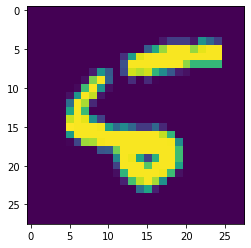

In [42]:
# Test the model
net.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    count = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images.squeeze())
        _, predicted = torch.max(outputs.data, 1)
        
        %matplotlib inline
        ind = 8
        plt.imshow(np.resize(images.cpu()[ind],(28,28,1)))
        print(predicted[ind])

        break

# Stock Price

## Data preprocessing

In [43]:
import pandas as pd

In [57]:
master_df = pd.DataFrame()
master_dict = dict()

In [50]:
df = pd.read_csv('google_stock_05-17.csv', sep=',', header=0, skiprows=0)
df

Date    Open    High     Low   Close    Volume
0     30-Jun-17  943.99  945.00  929.61  929.68   2287662
1     29-Jun-17  951.35  951.66  929.60  937.82   3206674
2     28-Jun-17  950.66  963.24  936.16  961.01   2745568
3     27-Jun-17  961.60  967.22  947.09  948.09   2443602
4     26-Jun-17  990.00  993.99  970.33  972.09   1517912
...         ...     ...     ...     ...     ...       ...
3140   7-Jan-05   95.42   97.22   94.48   97.02   9666175
3141   6-Jan-05   97.72   98.05   93.95   94.37  10389803
3142   5-Jan-05   96.82   98.55   96.21   96.85   8239545
3143   4-Jan-05  100.77  101.57   96.84   97.35  13762396
3144   3-Jan-05   98.80  101.92   97.83  101.46  15860692

[3145 rows x 6 columns]

In [58]:
df = pd.read_csv('google_stock_19-21.csv', sep=',', header=0, skiprows=0)
df

Date         Open         High          Low        Close  \
0    2019-04-29  1274.000000  1289.270020  1266.295044  1287.579956   
1    2019-04-30  1185.000000  1192.810059  1175.000000  1188.479980   
2    2019-05-01  1188.050049  1188.050049  1167.180054  1168.079956   
3    2019-05-02  1167.760010  1174.189941  1155.001953  1162.609985   
4    2019-05-03  1173.650024  1186.800049  1169.000000  1185.400024   
..          ...          ...          ...          ...          ...   
499  2021-04-21  2285.250000  2295.320068  2258.570068  2293.290039   
500  2021-04-22  2293.229980  2303.761963  2256.449951  2267.919922   
501  2021-04-23  2283.469971  2325.820068  2278.209961  2315.300049   
502  2021-04-26  2319.929932  2341.260010  2313.840088  2326.739990   
503  2021-04-27  2336.000000  2337.449951  2304.270020  2307.120117   

       Adj Close   Volume  
0    1287.579956  2499400  
1    1188.479980  6207000  
2    1168.079956  2639200  
3    1162.609985  1944800  
4    1185.400024  1980700  
..           ...      ...  
499  2293.290039  1196500  
500  2267.919922  1054800  
501  2315.300049  1433500  
502  2326.739990  1041700  
503  2307.120117  1587000  

[504 rows x 7 columns]

In [59]:
targets = [('Date','Date'),('Close','Close')]
for i,row in df.iterrows():
    for key in targets:
        try:
            master_dict[key[1]].append(row[key[0]])
        except:
            master_dict[key[1]] = [row[key[0]]]

In [60]:
master_dict

{'Date': ['2019-04-29',
  '2019-04-30',
  '2019-05-01',
  '2019-05-02',
  '2019-05-03',
  '2019-05-06',
  '2019-05-07',
  '2019-05-08',
  '2019-05-09',
  '2019-05-10',
  '2019-05-13',
  '2019-05-14',
  '2019-05-15',
  '2019-05-16',
  '2019-05-17',
  '2019-05-20',
  '2019-05-21',
  '2019-05-22',
  '2019-05-23',
  '2019-05-24',
  '2019-05-28',
  '2019-05-29',
  '2019-05-30',
  '2019-05-31',
  '2019-06-03',
  '2019-06-04',
  '2019-06-05',
  '2019-06-06',
  '2019-06-07',
  '2019-06-10',
  '2019-06-11',
  '2019-06-12',
  '2019-06-13',
  '2019-06-14',
  '2019-06-17',
  '2019-06-18',
  '2019-06-19',
  '2019-06-20',
  '2019-06-21',
  '2019-06-24',
  '2019-06-25',
  '2019-06-26',
  '2019-06-27',
  '2019-06-28',
  '2019-07-01',
  '2019-07-02',
  '2019-07-03',
  '2019-07-05',
  '2019-07-08',
  '2019-07-09',
  '2019-07-10',
  '2019-07-11',
  '2019-07-12',
  '2019-07-15',
  '2019-07-16',
  '2019-07-17',
  '2019-07-18',
  '2019-07-19',
  '2019-07-22',
  '2019-07-23',
  '2019-07-24',
  '2019-07-25',


In [53]:
import pickle
with open('data/stock_05-17.pkl', 'wb') as file:
    pickle.dump(master_dict, file)

In [61]:
import pickle
with open('data/stock_19-21.pkl', 'wb') as file:
    pickle.dump(master_dict, file)

## Experiments

In [63]:
with open('data/stock_05-17.pkl', 'rb') as file:
    train_dict = pickle.load(file)
with open('data/stock_19-21.pkl', 'rb') as file:
    test_dict = pickle.load(file)

In [68]:
# make tuples
train_data = []
for (date, close) in zip(train_dict['Date'], train_dict['Close']):
    train_data.append((date, close))
    
test_data = []
for (date, close) in zip(test_dict['Date'], test_dict['Close']):
    test_data.append((date, close))

In [213]:
import random
epochs = 1000
batch_size = 100
learning_rate = .0001

net = myLSTM(1, 200, 1, 1)

# Loss and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
optimizer.zero_grad()


#train
running_loss = []
for e in range(epochs):
    for i in range(batch_size):
        ind = random.randint(0,len(train_data)-80)
        input = torch.FloatTensor(np.array([[price / 2500.0] for (date, price) in train_data[ind:ind+64]]) ).unsqueeze(0)
        output = net(input)
        
        label = torch.FloatTensor([np.max([price for (date, price) in train_data[ind+64:ind+71]]) / 2500.0])

        # Backward and optimize
#         print(input, output, label)
        loss = criterion(output, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(e+1, epochs, i+1, batch_size, loss.item()))
        running_loss.append(loss.item())

C:\Users\jschu\miniconda3\envs\torch\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/1000], Step [100/100], Loss: 0.0028
Epoch [2/1000], Step [100/100], Loss: 0.0026
Epoch [3/1000], Step [100/100], Loss: 0.0050
Epoch [4/1000], Step [100/100], Loss: 0.0130
Epoch [5/1000], Step [100/100], Loss: 0.0002
Epoch [6/1000], Step [100/100], Loss: 0.0034
Epoch [7/1000], Step [100/100], Loss: 0.0000
Epoch [8/1000], Step [100/100], Loss: 0.0002
Epoch [9/1000], Step [100/100], Loss: 0.0004
Epoch [10/1000], Step [100/100], Loss: 0.0004
Epoch [11/1000], Step [100/100], Loss: 0.0002
Epoch [12/1000], Step [100/100], Loss: 0.0003
Epoch [13/1000], Step [100/100], Loss: 0.0001
Epoch [14/1000], Step [100/100], Loss: 0.0001
Epoch [15/1000], Step [100/100], Loss: 0.0001
Epoch [16/1000], Step [100/100], Loss: 0.0001
Epoch [17/1000], Step [100/100], Loss: 0.0003
Epoch [18/1000], Step [100/100], Loss: 0.0001
Epoch [19/1000], Step [100/100], Loss: 0.0000
Epoch [20/1000], Step [100/100], Loss: 0.0001
Epoch [21/1000], Step [100/100], Loss: 0.0000
Epoch [22/1000], Step [100/100], Loss: 0.00

Epoch [178/1000], Step [100/100], Loss: 0.0000
Epoch [179/1000], Step [100/100], Loss: 0.0001
Epoch [180/1000], Step [100/100], Loss: 0.0000
Epoch [181/1000], Step [100/100], Loss: 0.0000
Epoch [182/1000], Step [100/100], Loss: 0.0000


KeyboardInterrupt: 

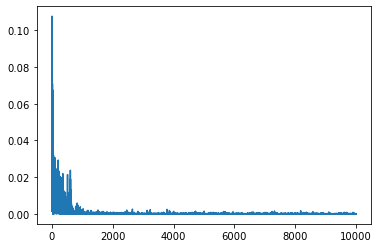

In [200]:
%matplotlib inline
plt.plot(running_loss)
plt.show()

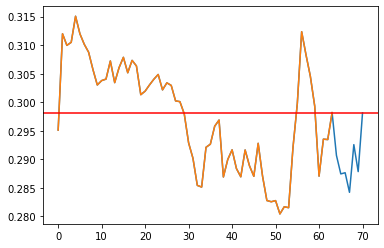

In [191]:
# double check data
ind = 300
test_set = [[price / 2500.0] for (date, price) in train_data[ind:ind+71]]
train_set = [[price / 2500.0] for (date, price) in train_data[ind:ind+64]]
label = np.max([price for (date, price) in train_data[ind+64:ind+71]]) / 2500.0

plt.plot(test_set)
plt.plot(train_set)

# last seven
# plt.axline((64,1200),(64,1201), c='green')
# predicted max
plt.axline((0,label),(1,label), c='red')
# actual max
# plt.axline((0,max_test),(1,max_test), c='orange')

plt.show()

In [181]:
[price for (date, price) in train_data[ind+64:ind+71]]

[209.86, 210.53, 211.09, 213.86, 213.93, 213.46, 213.54]

In [149]:
# build test set
new_test_set = []
test_size = 100
for i in range(test_size):
    ind = random.randint(0,len(test_data)-80)
    new_test_set.append( (
        torch.Tensor(np.array([[price] for (date, price) in test_data[ind:ind+64]]) ).unsqueeze(0),
        torch.Tensor([np.max([price for (date, price) in test_data[ind+64:ind+71]]) ])) )

In [160]:
net.eval()
error = []
with torch.no_grad():
    for (test, label) in new_test_set:
        output = net(test)

        error.append(np.abs(output.detach().numpy()[0][0] - label.detach().numpy()[0]))

    print(np.sum(error) / len(error))

1532.69765625


In [161]:
graph_set[0][0].detach().numpy()[0]
[price[0] for price in graph_set[0][0].detach().numpy()[0]]

TypeError: 'float' object is not subscriptable

In [162]:
ind = random.randint(0,len(test_data)-80)
ind

386

In [212]:
%matplotlib inline
ind = [0, 50, 100, 150, 200, 250]

net.eval()
with torch.no_grad():
    for i in ind:
        graph_set = [price for (date, price) in test_data[i:i+71]]
        test_graph = [price for (date, price) in test_data[i:i+64]]
        test_graph_label = [price for (date, price) in test_data[i+64:i+71]]

        max_test = np.max(test_graph_label)
        output = net(torch.Tensor(np.array([[price/2500] for (date, price) in test_data[i:i+64]]) ).unsqueeze(0))

        output = output.detach().numpy()[0][0] * 2500
        print(max_test, output)
        # # next seven
        # for price in test_data[ind+64:ind+71]:
        #     graph_set.append(price[1])

        plt.plot(graph_set)
        plt.plot(test_graph)
        # last seven
    #     plt.axline((64,.5),(64,.6), c='green')
        # predicted max
        plt.axline((0,output),(1,output), c='red')
        # actual max
        plt.axline((0,max_test),(1,max_test), c='orange')

        plt.savefig('output/'+str(i)+'_stockspred.jpg')
        plt.close()

1225.140015 1127.4635046720505
1253.069946 1155.6192487478256
1360.400024 1303.672045469284
1386.52002 1315.7042860984802
1410.420044 1325.712651014328
1531.449951 1483.78387093544


# max and min

In [ ]:
import random
epochs = 500
batch_size = 100
learning_rate = .0001

net = myLSTM(1, 500, 1, 2)

# Loss and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
optimizer.zero_grad()


#train
running_loss = []
for e in range(epochs):
    for i in range(batch_size):
        ind = random.randint(0,len(train_data)-80)
        input = torch.FloatTensor(np.array([[price / 2500.0] for (date, price) in train_data[ind:ind+64]]) ).unsqueeze(0)
        output = net(input)
        
        next_seven = [price for (date, price) in train_data[ind+64:ind+71]]
        label = [0,0]
        label[1] = np.max(next_seven) / 2500.0
        label[0] = np.min(next_seven) / 2500.0
        label = torch.FloatTensor([label])

        # Backward and optimize
#         print(input, output, label)
        loss = criterion(output, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(e+1, epochs, i+1, batch_size, loss.item()))
        running_loss.append(loss.item())

Epoch [1/500], Step [100/100], Loss: 0.0000
Epoch [2/500], Step [100/100], Loss: 0.0038
Epoch [3/500], Step [100/100], Loss: 0.0060
Epoch [4/500], Step [100/100], Loss: 0.0001
Epoch [5/500], Step [100/100], Loss: 0.0000
Epoch [6/500], Step [100/100], Loss: 0.0000
Epoch [7/500], Step [100/100], Loss: 0.0012
Epoch [8/500], Step [100/100], Loss: 0.0002
Epoch [9/500], Step [100/100], Loss: 0.0006
Epoch [10/500], Step [100/100], Loss: 0.0001
Epoch [11/500], Step [100/100], Loss: 0.0002
Epoch [12/500], Step [100/100], Loss: 0.0000
Epoch [13/500], Step [100/100], Loss: 0.0001
Epoch [14/500], Step [100/100], Loss: 0.0001
Epoch [15/500], Step [100/100], Loss: 0.0000
Epoch [16/500], Step [100/100], Loss: 0.0000
Epoch [17/500], Step [100/100], Loss: 0.0001
Epoch [18/500], Step [100/100], Loss: 0.0003
Epoch [19/500], Step [100/100], Loss: 0.0000
Epoch [20/500], Step [100/100], Loss: 0.0000
Epoch [21/500], Step [100/100], Loss: 0.0001
Epoch [22/500], Step [100/100], Loss: 0.0000
Epoch [23/500], Ste

Epoch [182/500], Step [100/100], Loss: 0.0000
Epoch [183/500], Step [100/100], Loss: 0.0000
Epoch [184/500], Step [100/100], Loss: 0.0001
Epoch [185/500], Step [100/100], Loss: 0.0000
Epoch [186/500], Step [100/100], Loss: 0.0000
Epoch [187/500], Step [100/100], Loss: 0.0000
Epoch [188/500], Step [100/100], Loss: 0.0000
Epoch [189/500], Step [100/100], Loss: 0.0000
Epoch [190/500], Step [100/100], Loss: 0.0000
Epoch [191/500], Step [100/100], Loss: 0.0000
Epoch [192/500], Step [100/100], Loss: 0.0000
Epoch [193/500], Step [100/100], Loss: 0.0000
Epoch [194/500], Step [100/100], Loss: 0.0000
Epoch [195/500], Step [100/100], Loss: 0.0000


In [228]:
%matplotlib inline
ind = [0, 50, 100, 150, 200, 250]

net.eval()
with torch.no_grad():
    for i in ind:
        graph_set = [price for (date, price) in test_data[i:i+71]]
        test_graph = [price for (date, price) in test_data[i:i+64]]
        test_graph_label = [price for (date, price) in test_data[i+64:i+71]]

        max_test = np.max(test_graph_label)
        min_test = np.min(test_graph_label)
        output = net(torch.Tensor(np.array([[price/2500] for (date, price) in test_data[i:i+64]]) ).unsqueeze(0))

        output = output.detach().numpy()[0] * 2500
        print(max_test, output)
        # # next seven
        # for price in test_data[ind+64:ind+71]:
        #     graph_set.append(price[1])

        plt.plot(graph_set)
        plt.plot(test_graph)
        # last seven
    #     plt.axline((64,.5),(64,.6), c='green')
        # predicted max
        plt.axline((0,output[0]),(1,output[0]), c='red')
        plt.axline((0,output[1]),(1,output[1]), c='red')
        # actual max
        plt.axline((0,max_test),(1,max_test), c='orange')
        plt.axline((0,min_test),(1,min_test), c='orange')

        plt.savefig('output/'+str(i)+'_stockspred.jpg')
        plt.close()

1225.140015 [1208.9342 1238.7697]
1253.069946 [1171.0997 1199.8132]
1360.400024 [1323.3428 1354.5146]
1386.52002 [1312.657  1343.1921]
1410.420044 [1322.107  1352.9058]
1531.449951 [1472.1808 1505.3654]
